<a href="https://colab.research.google.com/github/vikas-sirohi/Image-Compression/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Importing Image
# Just provide the path of the image file below.
image = cv2.imread('galaxy.jpeg')
image.shape # channels

(1600, 1574, 3)

In [ ]:
blue, green, red = cv2.split(image)
red.shape

(1600, 1574)

In [ ]:
# Blue Channel
plt.imshow(blue)

In [ ]:
# Green Channel
plt.imshow(green)

In [ ]:
# Red Channel
plt.imshow(red)

In [ ]:
image_merge = cv2.merge([red, green, blue])
plt.imshow(image_merge)

# SVD Part

In [ ]:
U, S, VT = np.linalg.svd(red, full_matrices = False)
S = np.diag(S)

for r in (5, 20, 100):
  red_approx = U[:, :r] @ S[0:r, :r] @ VT[:r, :]

  plt.imshow(red_approx)
  plt.show()


In [ ]:
U_red, S_red, VT_red = np.linalg.svd(red, full_matrices=False)
S_red = np.diag(S_red)
U_green, S_green, VT_green = np.linalg.svd(green, full_matrices=False)
S_green = np.diag(S_green)
U_blue, S_blue, VT_blue = np.linalg.svd(blue, full_matrices=False)
S_blue = np.diag(S_blue)

This image is approximated to  5 rank


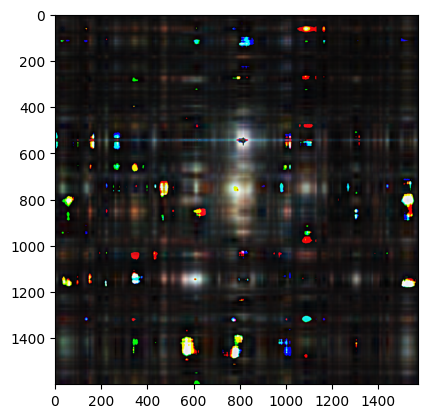

This image is approximated to  20 rank


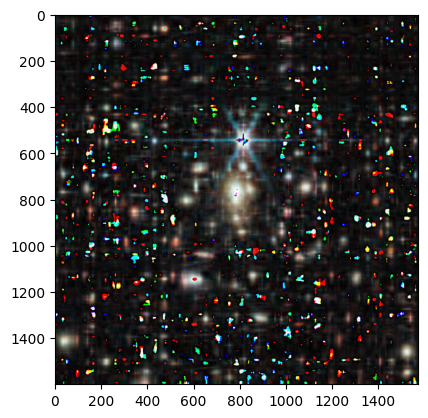

This image is approximated to  100 rank


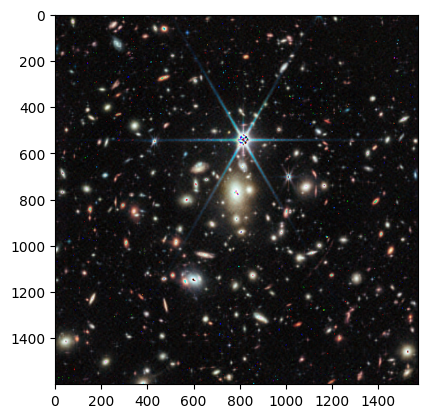

This image is approximated to  150 rank


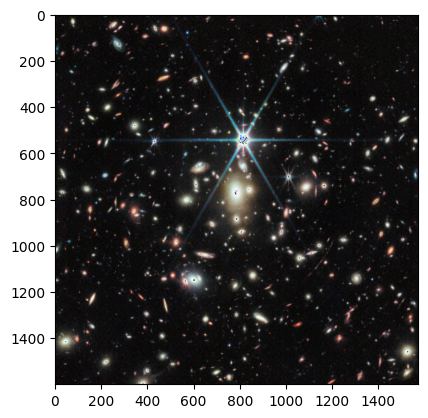

In [ ]:
for r in (5, 20, 100, 150):
  red_approx = U_red[:, :r] @ S_red[0:r, :r] @ VT_red[:r, :]
  green_approx = U_green[:, :r] @ S_green[0:r, :r] @ VT_green[:r, :]
  blue_approx = U_blue[:, :r] @ S_blue[0:r, :r] @ VT_blue[:r, :]
  print("This image is approximated to " , r ,"rank")
  image_merge = cv2.merge([red_approx, green_approx, blue_approx])
  plt.imshow(image_merge.astype("uint8"))
  plt.show()